# Monitoring changes in $NO_{2}$ concentration from space

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction<a class="anchor" id="1"></a></a></span><ul class="toc-item"><li><span><a href="#Observing-$NO_{2}$-from-space" data-toc-modified-id="Observing-$NO_{2}$-from-space-1.1">Observing $NO_{2}$ from space</a></span></li><li><span><a href="#Sentinel-5-P-and-TROPOMI-sensor" data-toc-modified-id="Sentinel-5-P-and-TROPOMI-sensor-1.2">Sentinel 5-P and TROPOMI sensor</a></span></li><li><span><a href="#Objective-of-this-study" data-toc-modified-id="Objective-of-this-study-1.3">Objective of this study</a></span></li></ul></li><li><span><a href="#Download-Sentinel-5P-data" data-toc-modified-id="Download-Sentinel-5P-data-2">Download Sentinel 5P data</a></span><ul class="toc-item"><li><span><a href="#Search-for-data-using-SentinelSat-API" data-toc-modified-id="Search-for-data-using-SentinelSat-API-2.1">Search for data using SentinelSat API</a></span></li><li><span><a href="#Get-NO2-data-for-April-1-7-2020" data-toc-modified-id="Get-NO2-data-for-April-1-7-2020-2.2">Get NO2 data for April 1-7 2020</a></span></li><li><span><a href="#Get-NO2-data-for-April-1-7-2019" data-toc-modified-id="Get-NO2-data-for-April-1-7-2019-2.3">Get NO2 data for April 1-7 2019</a></span></li><li><span><a href="#Get-2020-data" data-toc-modified-id="Get-2020-data-2.4">Get 2020 data</a></span><ul class="toc-item"><li><span><a href="#Export-orbit-information-to-GeoPandas-GeoDataFrame" data-toc-modified-id="Export-orbit-information-to-GeoPandas-GeoDataFrame-2.4.1">Export orbit information to GeoPandas GeoDataFrame</a></span></li><li><span><a href="#Download-2020-dataset-in-parallel" data-toc-modified-id="Download-2020-dataset-in-parallel-2.4.2">Download 2020 dataset in parallel</a></span></li></ul></li><li><span><a href="#Download-2019-dataset-in-parallel" data-toc-modified-id="Download-2019-dataset-in-parallel-2.5">Download 2019 dataset in parallel</a></span><ul class="toc-item"><li><span><a href="#Export-orbit-information-to-GeoPandas-GeoDataFrame" data-toc-modified-id="Export-orbit-information-to-GeoPandas-GeoDataFrame-2.5.1">Export orbit information to GeoPandas GeoDataFrame</a></span></li></ul></li><li><span><a href="#Download-data-for-2019-in-parallel" data-toc-modified-id="Download-data-for-2019-in-parallel-2.6">Download data for 2019 in parallel</a></span></li></ul></li><li><span><a href="#Explore-NetCDF-files" data-toc-modified-id="Explore-NetCDF-files-3">Explore NetCDF files</a></span></li><li><span><a href="#Create-Multidimensional-Raster" data-toc-modified-id="Create-Multidimensional-Raster-4">Create Multidimensional Raster</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-Mosaic-DataSet" data-toc-modified-id="Create-Mosaic-DataSet-4.0.1">Create Mosaic DataSet</a></span></li><li><span><a href="#Add-rasters-to-the-mosaic-dataset" data-toc-modified-id="Add-rasters-to-the-mosaic-dataset-4.0.2">Add rasters to the mosaic dataset</a></span></li></ul></li><li><span><a href="#Automation-for-all-data-over-NY" data-toc-modified-id="Automation-for-all-data-over-NY-4.1">Automation for all data over NY</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

## Introduction<a class="anchor" id="1"></a>

Nitrogen oxides (NOx) are group of highly reactive gases of which Nirogen Dioxide ($NO_{2}$) is a major trace gas. The main sources of $NO_{2}$ emission into the atmosphere are burning of fossil fuels, be it through power plants or via vehicler emission [[2](#References)]. $NO_{2}$ at high concentrations can irritate airways in human respiratory system and can aggravate respiratory diseases such as asthma. Long term exposure to high levels of $NO_{2}$, can lead to development of respiratory diseases [[2](#References)].

Since March of 2020, the COVID-19 respiratory virus has spread into a pandemic, affecting the entire world. Studying $NO_{2}$ concentrations has become even more pertinent since COVID-19 is a respiratory virus.

<div class="alert alert-info">
    <b>Note:</b> To run this notebook, you need <code>geopandas</code> and <code>sentinelsat</code> Python libraries. You can install them using the following command.
    
    conda install -c conda-forge geopandas
    pip install sentinelsat
</div>

### Observing $NO_{2}$ from space

$NO_{2}$ gas has a specific absorption spectra which can be picked up by imaging spectrometers on board satellites. $NO_{2}$ is a shortlived gas in the atmosphere [1](#References) and generally dissipates within 3 hours of emission. This means, any concentration observed from space can usually be associated with a point of origin that is in the immediate vicinity of the place it is observed. By observing the levels of $NO_{2}$ continuously over space and time, we can monitor its concentration and attribute that to changing fossil fuel usage patterns on the ground. For instance, the graphic below from [LA Times](https://www.latimes.com/projects/los-angeles-coronavirus-slowdown-maps/) compares the $NO_{2}$ concentration over Los Angeles between two dates to understand if stay-at-home orders led to any reduction in air pollution.

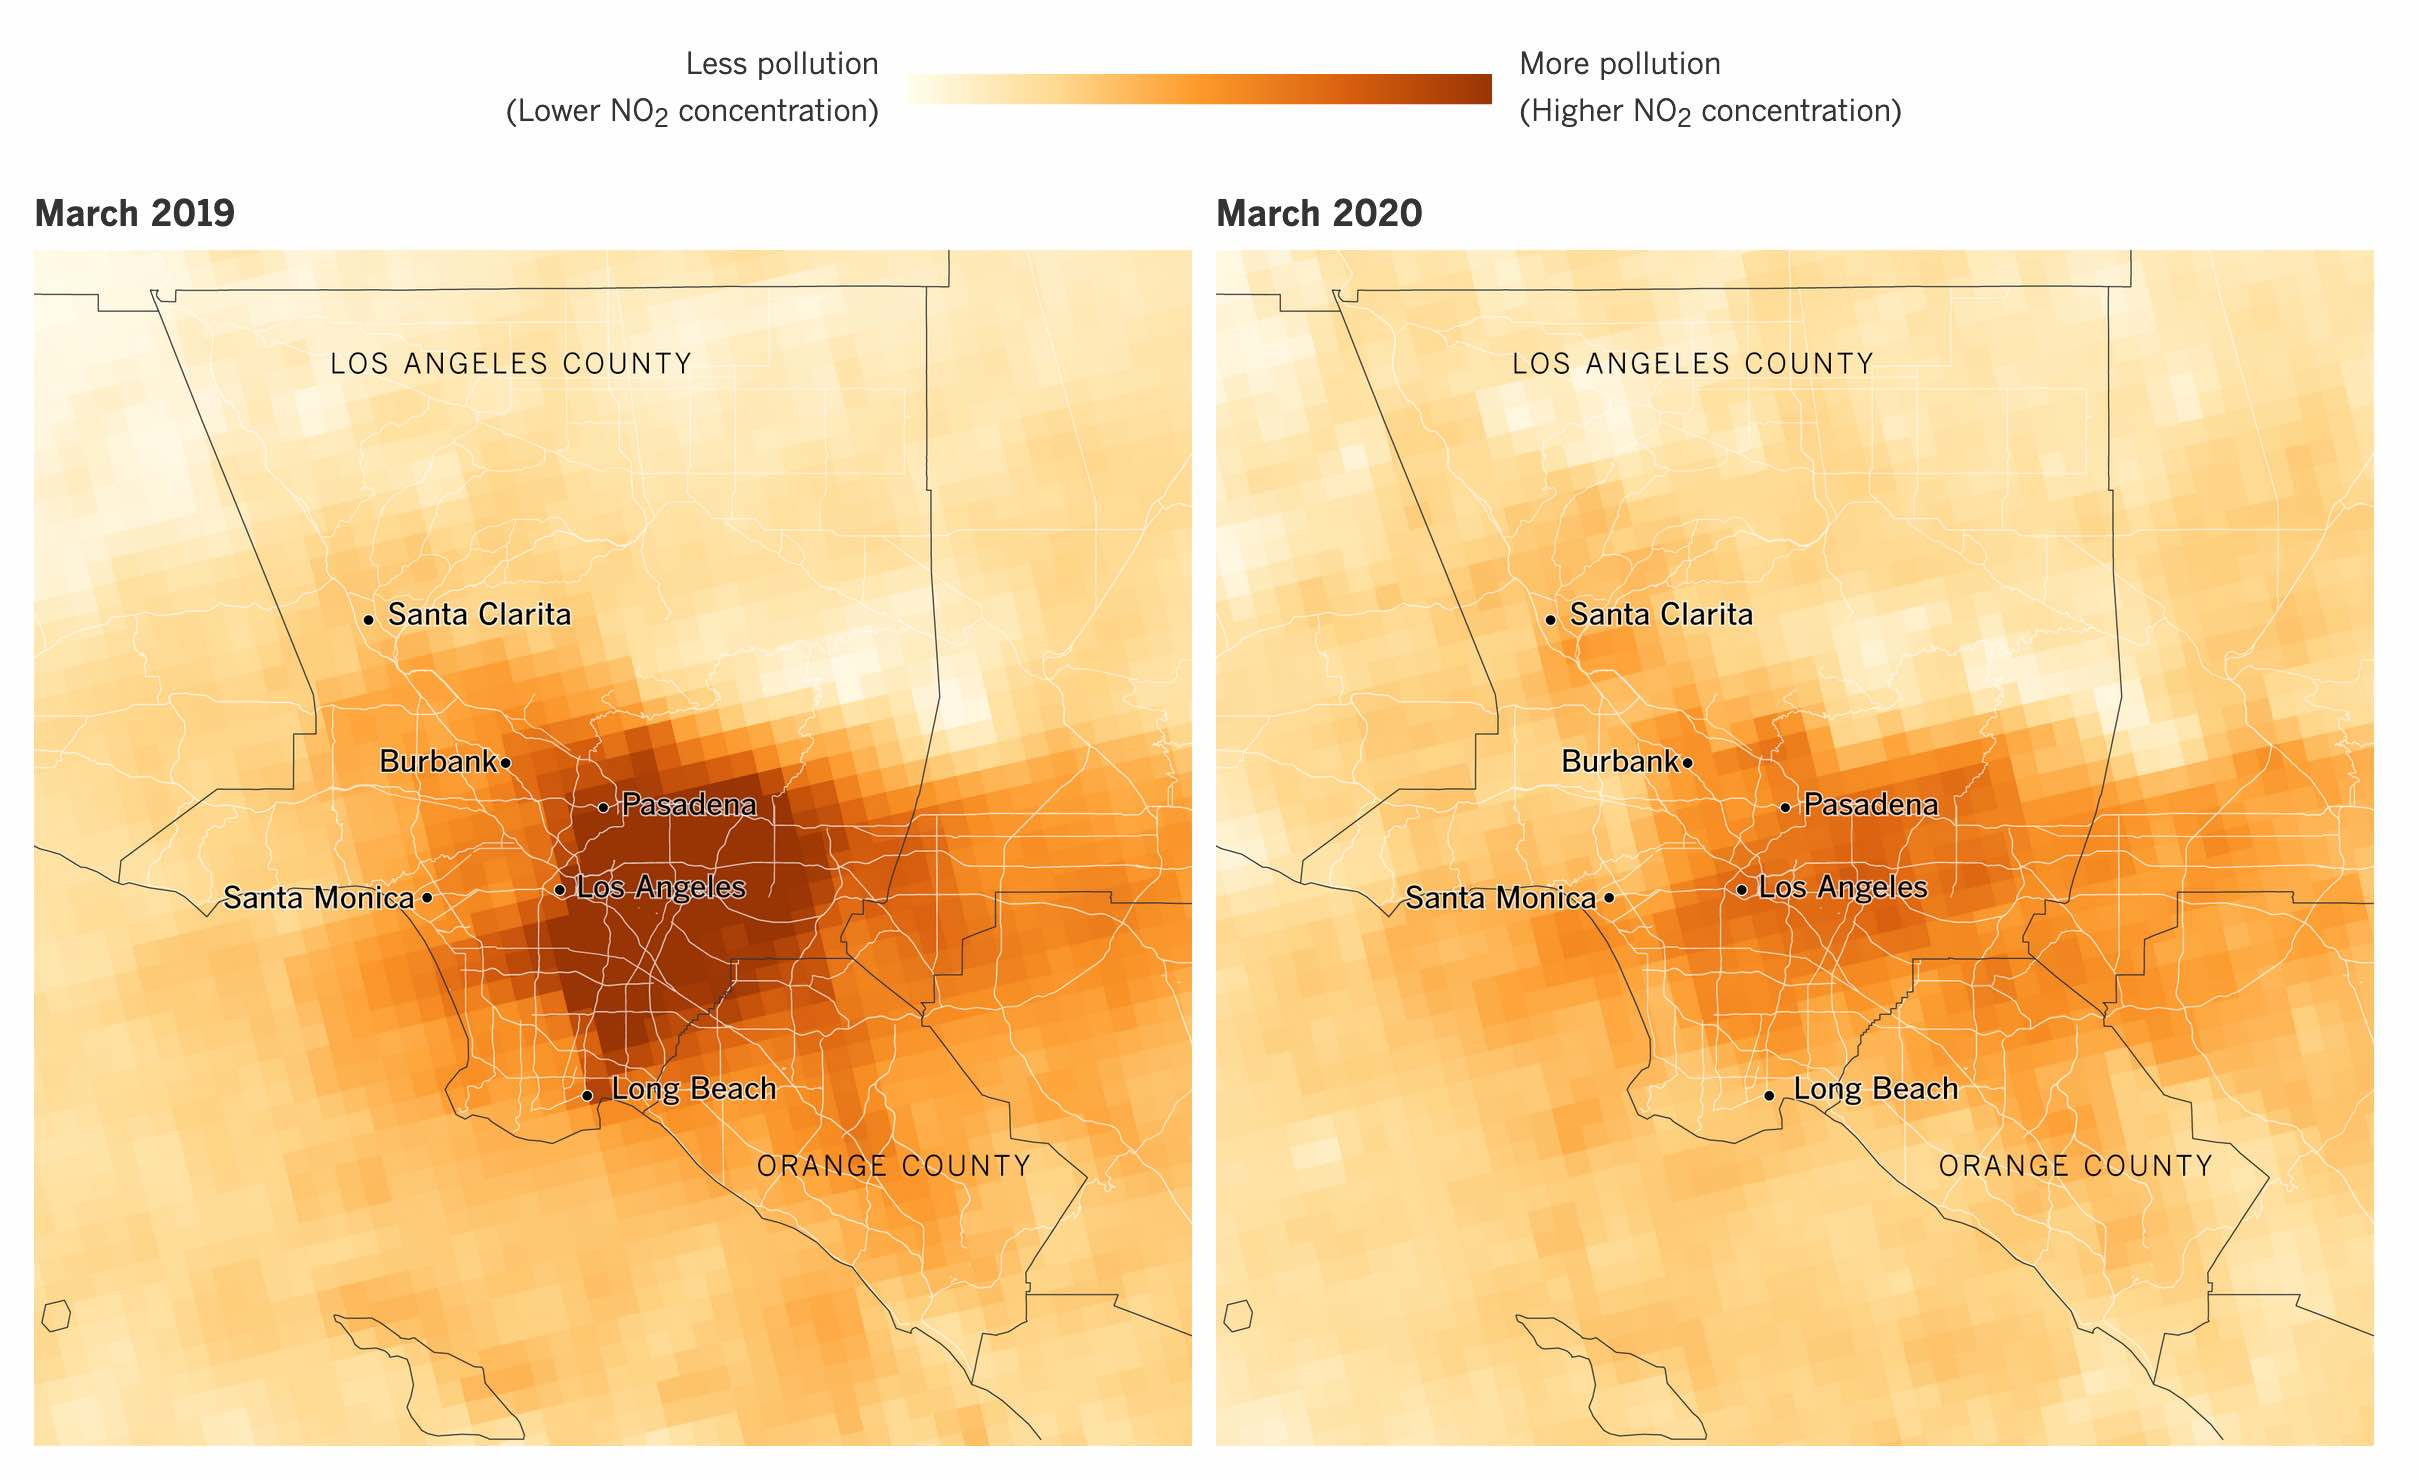
<center><i>Source: LA Times article: <a href="https://www.latimes.com/projects/los-angeles-coronavirus-slowdown-maps/">As Los Angeles confronts coronavirus, a slower city is visible from above</a></i></center>

### Sentinel 5-P and TROPOMI sensor

As satellite remote sensing data is able to cover both the spatial distribution and temporal variation of atmospheric gases, it is widely accepted over the traditional atmosphere monitoring techniques. [The Sentinel-5 Precursor](https://sentinel.esa.int/web/sentinel/missions/sentinel-5p) is ESA's first Copernicus mission operating exclusively for atmospheric monitoring. The mission has one satellite containing TROPOspheric Monitoring Instrument (TROPOMI). 

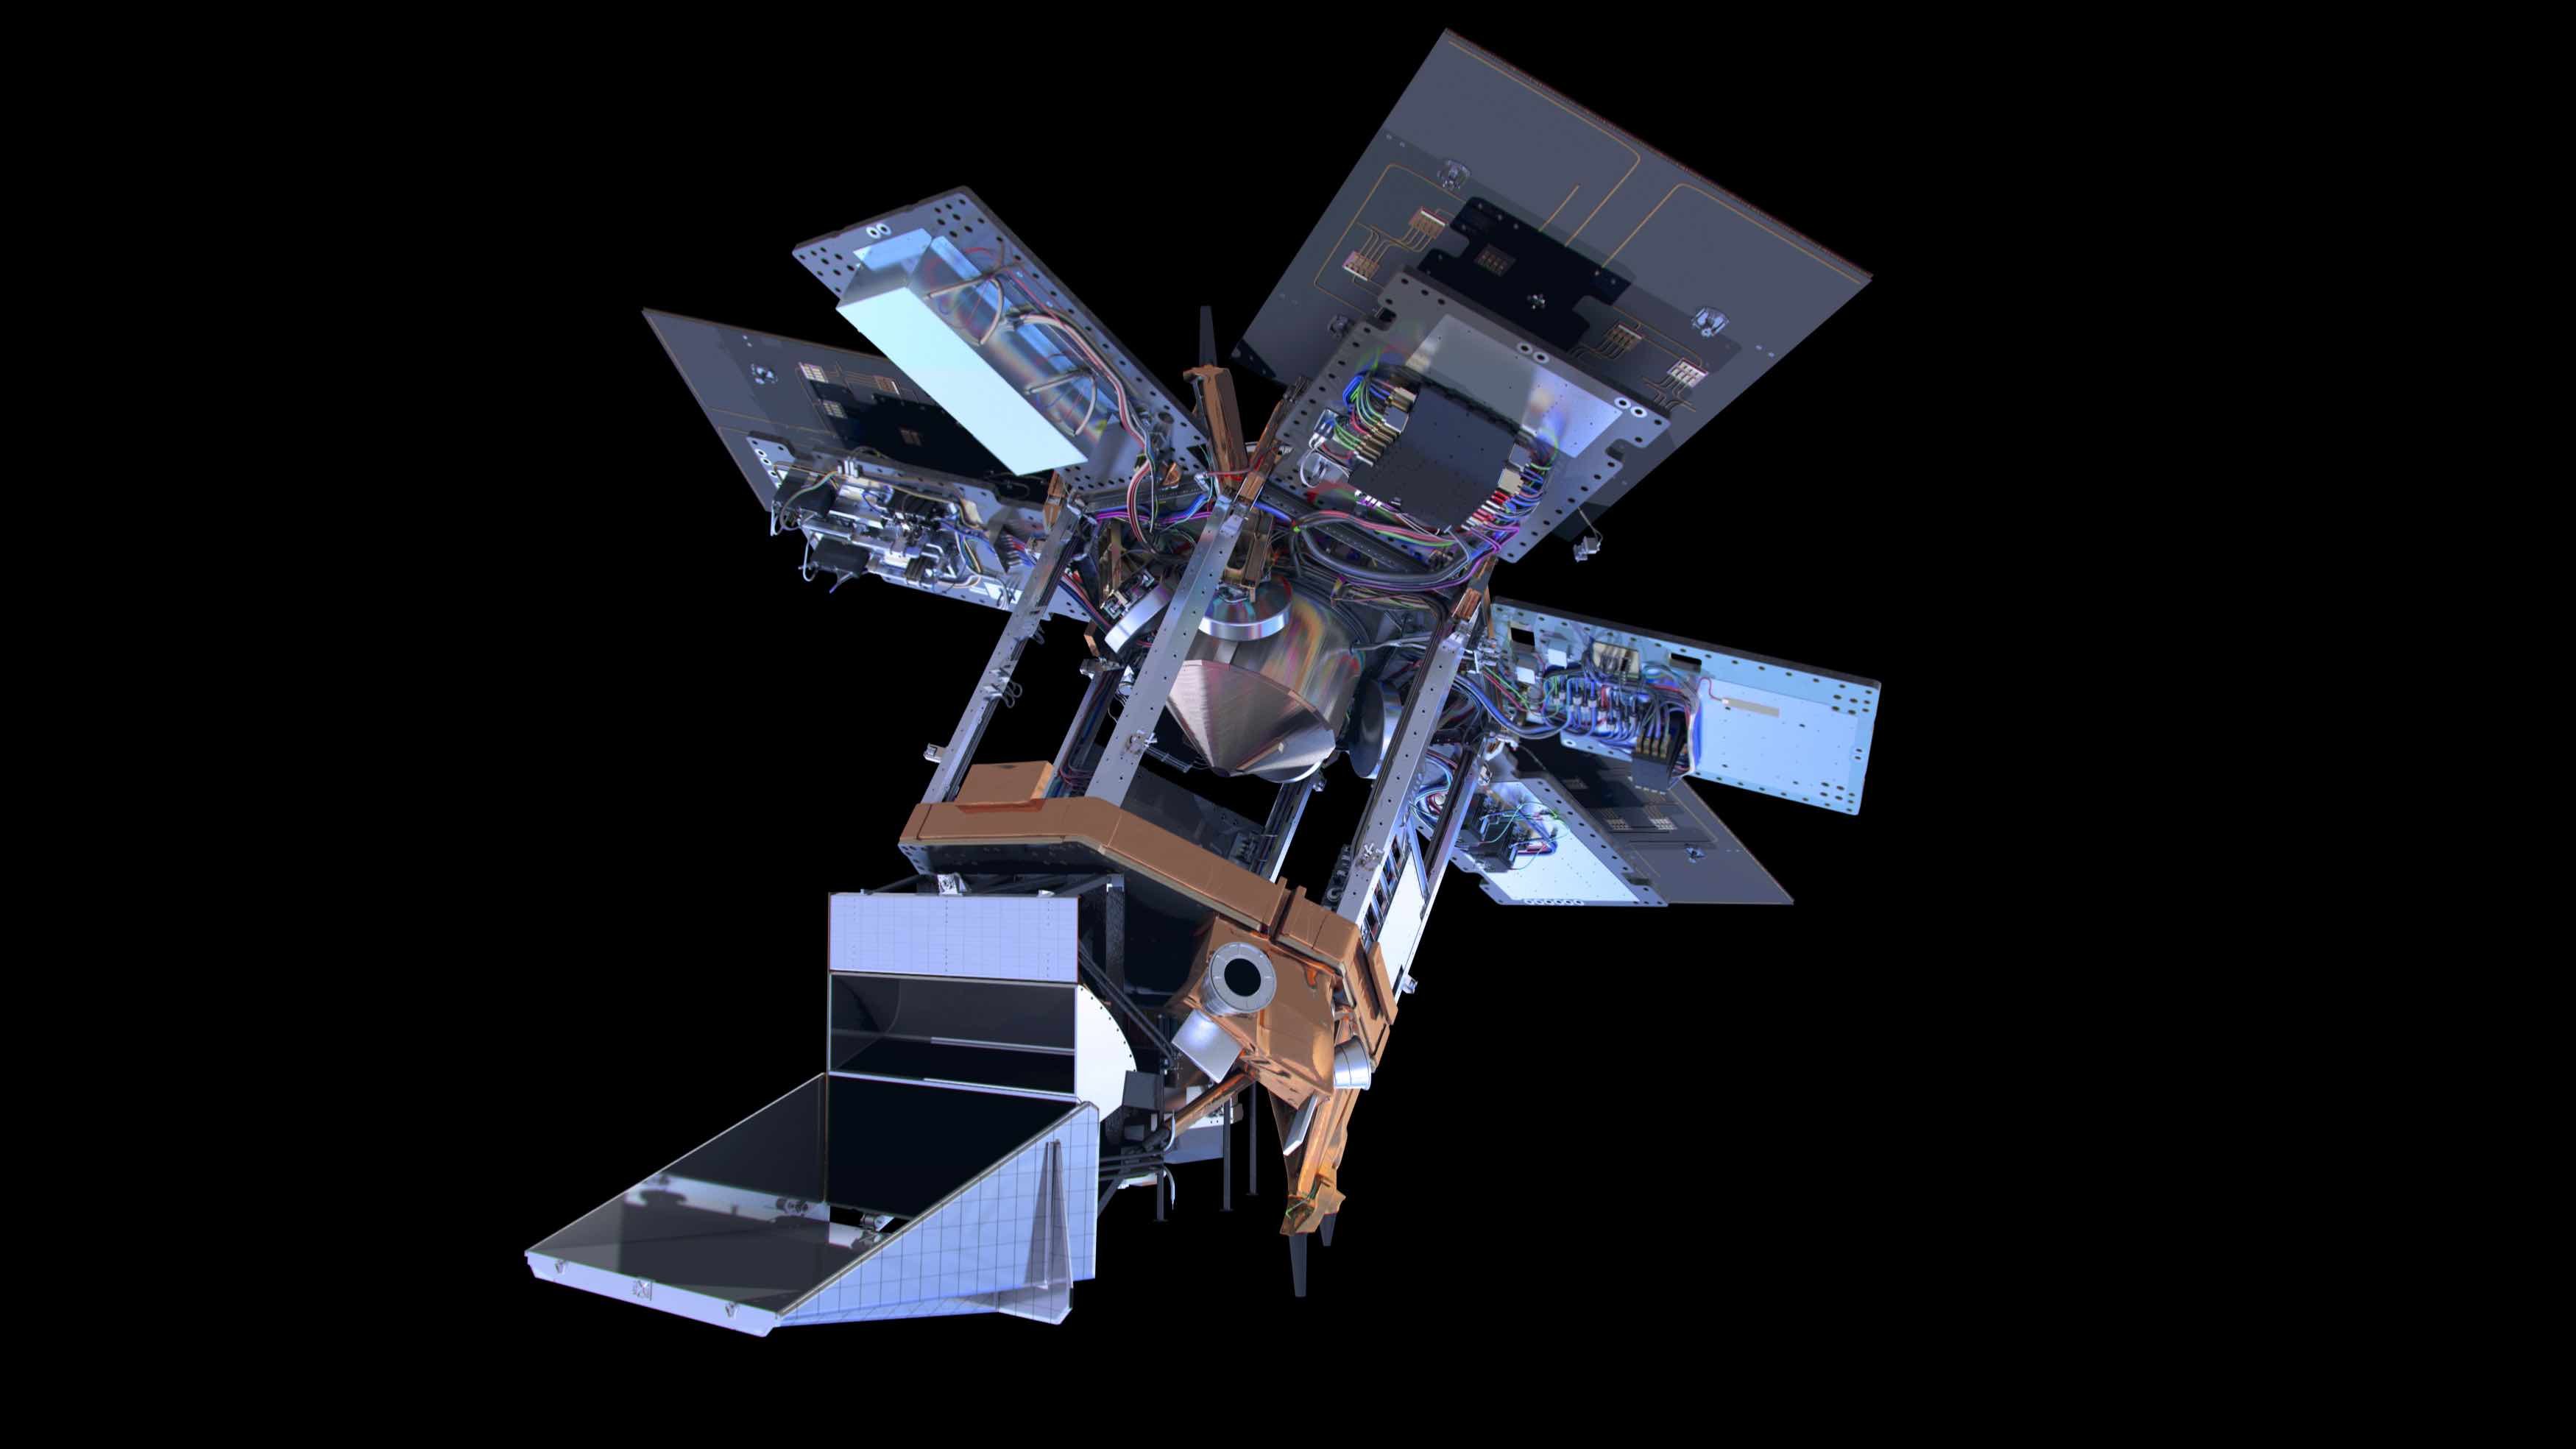
<center><i>Rendition of Sentinel 5 Precursor satellite in space</i></center>

TROPOMI is an [imaging spectrometer sensor](https://earthdata.nasa.gov/learn/remote-sensors#passive-sensors) has bands in UV and Visible parts of the spectrum which allows us to measure tropospheric $NO_{2}$, among other gasses. The [NO2 data product](https://sentinel.esa.int/documents/247904/2474726/Sentinel-5P-Level-2-Product-User-Manual-Nitrogen-Dioxide) available as an [L2](https://sentinel.esa.int/web/sentinel/missions/sentinel-5p/data-products) data product is used in the current study to study the changes in the $NO_{2}$ concentration due to COVID-19 lockdown. The spatial resolution at nadir is 7x3.5 $km^{2}$.

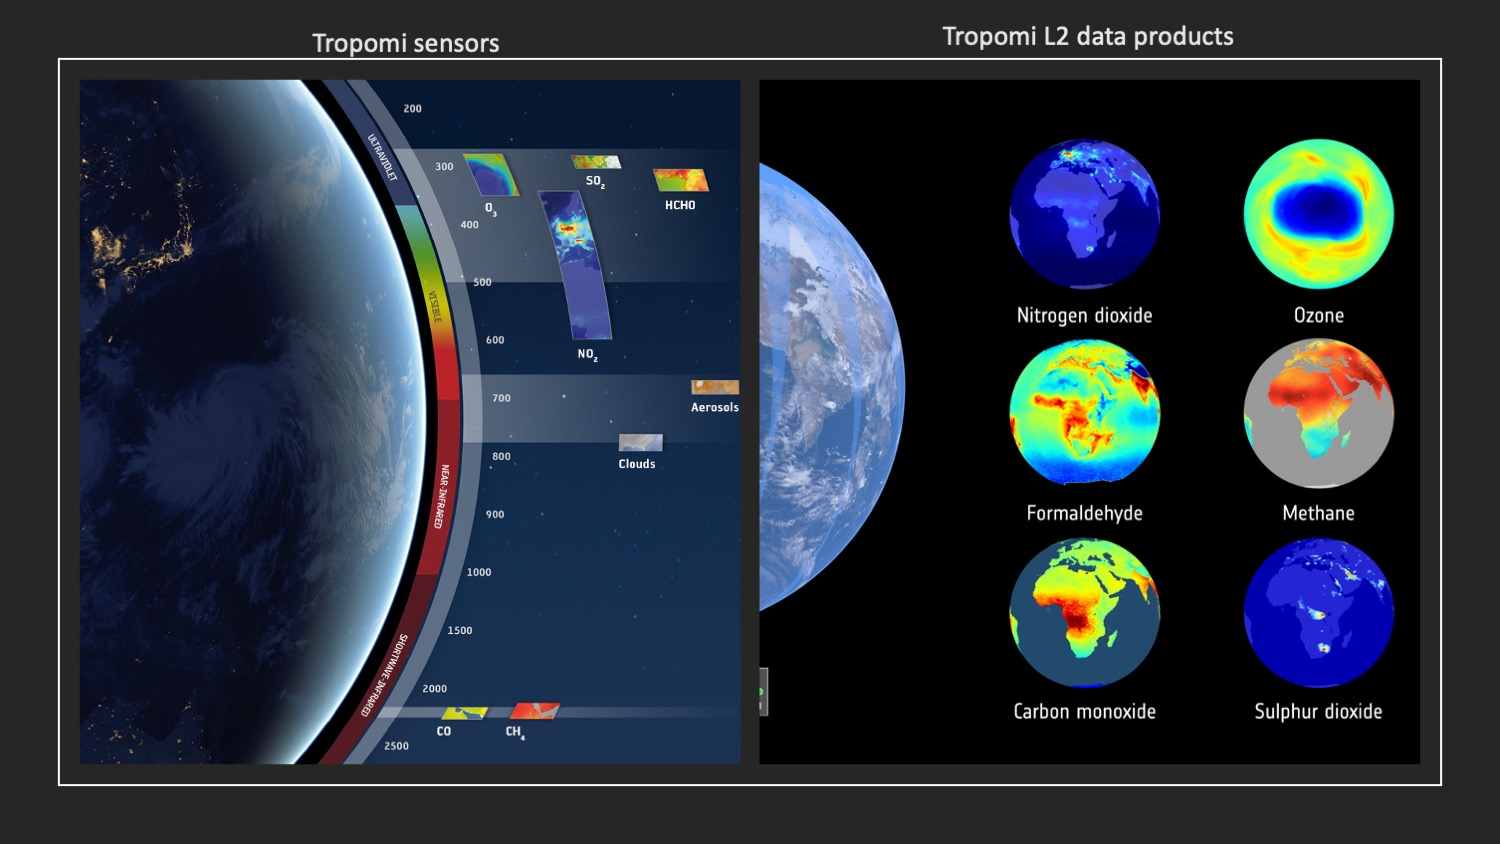
<center><i>Tropomi sensor and data products. Source: <a href="https://www.esa.int/Applications/Observing_the_Earth/Copernicus">ESA, Copernicus programme</a></i></center>

### Objective of this study
As coronavirus became a pandemic, countries around the world issued shelter-in-place orders. The impact of this was so dramatic that it is visible from space. In this notebook we will use TROPOMI's NO2 data to observe if the effects of mass sheltering-in-place could through a reduction in tropospheric NO2. We will compare the mean NO2 concentration during the first week of April 2020 for the City of New York with April 2019.

The notebook will demonstrate a programmatic pattern to query and download Sentinel-5P datasets in NetCDF file format. It uses the newer `arcgis.raster.Raster` class to analyze local file-based multi-dimensional rasters needed for this study.

## Download Sentinel 5P data

In [8]:
# import ArcGIS libraries
from arcgis.gis import GIS
from arcgis.features import FeatureSet, FeatureCollection, Feature, GeoAccessor
from datetime import datetime, timedelta
from arcgis.geometry import Polygon

# import scientific Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray
import netCDF4

# import open-geo Python libraries
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

# import standard Python libraries
import json
from glob import glob
from pathlib import Path
import os
from datetime import date

In [3]:
gis = GIS(profile='your_online_profile')
download_path_base = 'E:/GIS_Data/Imagery/sentinel-5p/ny-2019-2020'

### Search for data using SentinelSat API

Log into the [Sentinel Hub portal](https://s5phub.copernicus.eu/dhus/#/home) using the temporary credentials as advised on the portal site.

In [16]:
api = SentinelAPI('s5pguest', 's5pguest', 'https://s5phub.copernicus.eu/dhus')
api

Use the accompanying GeoJSON file to load a bounding box around the city of New York.

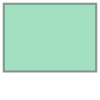

In [17]:
ny_poly = Polygon({'spatialReference': {'latestWkid': 4326},
                'rings': [[
                         [-74.12612915039062,40.686886382151116],[-73.89541625976562,40.686886382151116],
                         [-73.89541625976562,40.85588988330874],[-74.12612915039062,40.85588988330874],
                         [-74.12612915039062,40.686886382151116]
                         ]]
                  })
ny_poly

### Get NO2 data for April 1-7 2020

In [8]:
# search for scenes matching the start/end dates and the area of interest
api.count(area=ny_poly.WKT, date=('20200401', '20200407'), area_relation='Contains', 
          platformname='Sentinel-5',producttype='L2__NO2___')

9

### Get NO2 data for April 1-7 2019

In [9]:
# search for scenes matching the start/end dates and the area of interest
api.count(area=ny_poly.WKT, date=('20190401', '20190407'), area_relation='Contains', 
          platformname='Sentinel-5',producttype='L2__NO2___')

7

### Get 2020 data

In [10]:
products_2020 = api.query(area=ny_poly.WKT, area_relation='Contains',
                         date=('20200401', '20200407'),
                         platformname='Sentinel-5',
                         producttype='L2__NO2___',
                         order_by='cloudcoverpercentage'
                        )

In [11]:
products_2020_df = api.to_dataframe(products_2020)
products_2020_df.head()

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,filename,...,platformshortname,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid
4522f28f-b449-40dc-ab83-48929bab4b7c,S5P_OFFL_L2__NO2____20200403T171201_20200403T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-03T17:33:36Z, Instrument: TROPOM...",2020-04-21 08:10:15.498,2020-04-03 17:33:36,2020-04-03 18:31:59,12816,S5P_OFFL_L2__NO2____20200403T171201_20200403T1...,...,S5P,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.47 MB,4522f28f-b449-40dc-ab83-48929bab4b7c
bcfad3af-8fed-4632-9c52-c6809b09aaac,S5P_OFFL_L2__NO2____20200402T173057_20200402T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-02T17:52:30Z, Instrument: TROPOM...",2020-04-21 08:05:30.422,2020-04-02 17:52:30,2020-04-02 18:50:55,12802,S5P_OFFL_L2__NO2____20200402T173057_20200402T1...,...,S5P,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.04 MB,bcfad3af-8fed-4632-9c52-c6809b09aaac
29f6ea02-dbe5-4714-bffb-7e4e72f9d6b6,S5P_OFFL_L2__NO2____20200402T154926_20200402T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-02T16:11:01Z, Instrument: TROPOM...",2020-04-21 08:05:31.660,2020-04-02 16:11:01,2020-04-02 17:09:24,12801,S5P_OFFL_L2__NO2____20200402T154926_20200402T1...,...,S5P,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.23 MB,29f6ea02-dbe5-4714-bffb-7e4e72f9d6b6
ee687f6d-8f70-4834-8cc8-602ff7c9dd28,S5P_OFFL_L2__NO2____20200401T160821_20200401T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-01T16:29:56Z, Instrument: TROPOM...",2020-04-10 22:35:32.955,2020-04-01 16:29:56,2020-04-01 17:28:19,12787,S5P_OFFL_L2__NO2____20200401T160821_20200401T1...,...,S5P,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,429.8 MB,ee687f6d-8f70-4834-8cc8-602ff7c9dd28
a3110c30-ff8d-45d4-befd-514278b009b9,S5P_OFFL_L2__NO2____20200401T174952_20200401T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-01T18:11:26Z, Instrument: TROPOM...",2020-04-11 06:35:28.187,2020-04-01 18:11:26,2020-04-01 19:09:50,12788,S5P_OFFL_L2__NO2____20200401T174952_20200401T1...,...,S5P,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.56 MB,a3110c30-ff8d-45d4-befd-514278b009b9


#### Export orbit information to GeoPandas GeoDataFrame

In [75]:
import warnings; warnings.simplefilter('ignore')
products_2020_gdf = api.to_geodataframe(products_2020)
products_2020_sdf = pd.DataFrame.spatial.from_geodataframe(products_2020_gdf)

MapView(layout=Layout(height='400px', width='100%'), mode='3D')


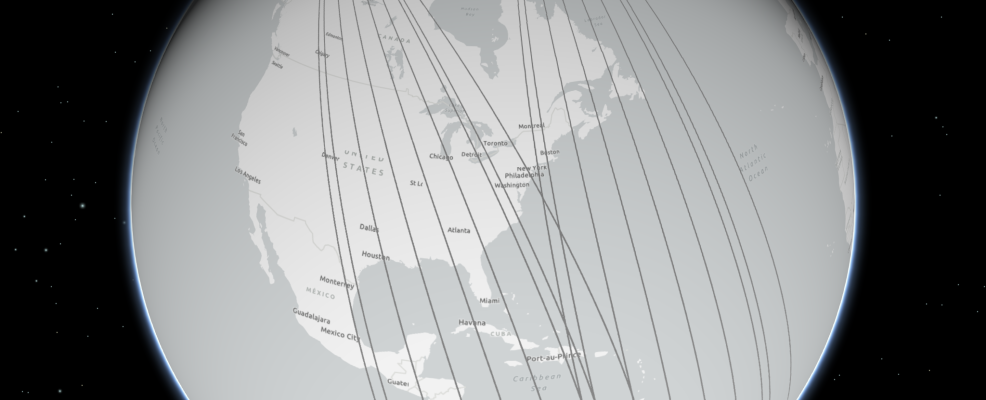

In [14]:
map1 = gis.map('USA')
map1.mode='3D'
map1.basemap = 'gray-vector'
map1

In [15]:
products_2020_sdf.spatial.plot(map1, palette = 'PuBu', renderer_type='u',col='uuid', alpha=0.1)

True

#### Download 2020 dataset in parallel

In [20]:
download_path_2020 = os.path.join(download_path_base, '04-2020')
if os.path.exists(download_path_2020):
    print(download_path_2020)
else:
    os.mkdir(download_path_2020)
    print('Created download path: ' + download_path_2020)

E:/GIS_Data/Imagery/sentinel-5p/ny-2019-2020\04-2020


In [95]:
len(products_2020)

9

In [ ]:
# download_all function downloads the requested concurrently
succeeded, scheduled, failed = api.download_all(products_2020,
                                                directory_path=download_path_2020, 
                                                n_concurrent_dl=4)

In [80]:
len(succeeded), len(scheduled), len(failed)

(9, 0, 0)

All files have been downloaded. At the time of writing this notebook, a [bug](https://github.com/sentinelsat/sentinelsat/issues/270) in the `sentinelsat` API causes it to download files as `.zip` while they are `.nc` files. Hence, in this section, we will rename the files in the cell below

In [12]:
file_list = glob(download_path_2020 + "/S5P_OFFL_*.zip")
file_list_2020 = []
for file in file_list:
    p = Path(file)
    new_name = p.with_suffix('.nc')
    # change extension
    p_new = p.rename(new_name)

    file_list_2020.append(new_name.name)
    print(new_name.name)


S5P_OFFL_L2__NO2____20200403T171201_20200403T185332_12816_01_010302_20200415T002747.nc
S5P_OFFL_L2__NO2____20200404T165306_20200404T183437_12830_01_010302_20200406T095043.nc
S5P_OFFL_L2__NO2____20200405T163411_20200405T181542_12844_01_010302_20200407T092808.nc
S5P_OFFL_L2__NO2____20200406T161516_20200406T175646_12858_01_010302_20200408T085416.nc
S5P_OFFL_L2__NO2____20200406T175646_20200406T193817_12859_01_010302_20200408T152239.nc


### Download 2019 dataset in parallel

In [21]:
products_2019 = api.query(area=ny_poly.WKT, area_relation='Contains',
                         date=('20190401', '20190407'),
                         platformname='Sentinel-5',
                         producttype='L2__NO2___',
                         order_by='cloudcoverpercentage'
                        )

In [22]:
products_2019_df = api.to_dataframe(products_2019)
products_2019_df.head()

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,filename,...,platformshortname,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid
68346f39-ecb5-469f-8229-3071d8ad55ea,S5P_OFFL_L2__NO2____20190403T163351_20190403T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-04-03T16:55:25Z, Instrument: TROPOM...",2019-04-16 03:35:27.223,2019-04-03 16:55:25,2019-04-03 17:53:49,7623,S5P_OFFL_L2__NO2____20190403T163351_20190403T1...,...,S5P,L2,Offline,OFFL,010300,L2__NO2___,Nitrogen Dioxide,01,333.84 MB,68346f39-ecb5-469f-8229-3071d8ad55ea
5098849b-05f1-4710-b3db-880e54417c9a,S5P_OFFL_L2__NO2____20190401T171141_20190401T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-04-01T17:33:15Z, Instrument: TROPOM...",2019-04-13 18:35:36.368,2019-04-01 17:33:15,2019-04-01 18:31:40,7595,S5P_OFFL_L2__NO2____20190401T171141_20190401T1...,...,S5P,L2,Offline,OFFL,010300,L2__NO2___,Nitrogen Dioxide,01,334.75 MB,5098849b-05f1-4710-b3db-880e54417c9a
cc457d4b-4b5f-4c77-919e-fe10b3a5b77a,S5P_OFFL_L2__NO2____20190405T155600_20190405T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-04-05T16:17:35Z, Instrument: TROPOM...",2019-04-18 07:05:47.279,2019-04-05 16:17:35,2019-04-05 17:15:58,7651,S5P_OFFL_L2__NO2____20190405T155600_20190405T1...,...,S5P,L2,Offline,OFFL,010300,L2__NO2___,Nitrogen Dioxide,01,333.85 MB,cc457d4b-4b5f-4c77-919e-fe10b3a5b77a
c1baa729-b1da-447e-b95d-40e6c8cb0fc7,S5P_OFFL_L2__NO2____20190405T173731_20190405T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-04-05T17:59:05Z, Instrument: TROPOM...",2019-04-18 07:05:49.048,2019-04-05 17:59:05,2019-04-05 18:57:29,7652,S5P_OFFL_L2__NO2____20190405T173731_20190405T1...,...,S5P,L2,Offline,OFFL,010300,L2__NO2___,Nitrogen Dioxide,01,338.56 MB,c1baa729-b1da-447e-b95d-40e6c8cb0fc7
2be63f4d-19bf-4bbb-a832-7a13f1947295,S5P_OFFL_L2__NO2____20190406T171835_20190406T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-04-06T17:40:10Z, Instrument: TROPOM...",2019-04-18 15:05:44.739,2019-04-06 17:40:10,2019-04-06 18:38:33,7666,S5P_OFFL_L2__NO2____20190406T171835_20190406T1...,...,S5P,L2,Offline,OFFL,010300,L2__NO2___,Nitrogen Dioxide,01,333.59 MB,2be63f4d-19bf-4bbb-a832-7a13f1947295


#### Export orbit information to GeoPandas GeoDataFrame

In [83]:
import warnings; warnings.simplefilter('ignore')
products_2019_gdf = api.to_geodataframe(products_2019)
products_2019_sdf = pd.DataFrame.spatial.from_geodataframe(products_2019_gdf)

In [84]:
map2 = gis.map('USA')
map2.mode='3D'
map2.basemap = 'gray-vector'
map2

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [85]:
products_2019_sdf.spatial.plot(map2, palette = 'PuBu', renderer_type='u',col='uuid', alpha=0.1)

True

### Download data for 2019 in parallel

In [4]:
download_path_2019 = os.path.join(download_path_base, '04-2019')
if os.path.exists(download_path_2019):
    print(download_path_2019)
else:
    os.mkdir(download_path_2019)
    print('Created download path: ' + download_path_2019)

E:/GIS_Data/Imagery/sentinel-5p/ny-2019-2020\04-2019


In [ ]:
# download_all function downloads the requested concurrently
succeeded, scheduled, failed = api.download_all(products_2019,
                                                directory_path=download_path_2019, 
                                                n_concurrent_dl=4)

In [26]:
len(succeeded)

7

In [28]:
file_list = glob(download_path_2019 + "/S5P_OFFL_*.zip")
file_list_2019 = []
for file in file_list:
    p = Path(file)
    new_name = p.with_suffix('.nc')
    # change extension
    p_new = p.rename(new_name)

    file_list_2019.append(new_name.name)
    print(new_name.name)

S5P_OFFL_L2__NO2____20190403T163351_20190403T181521_07623_01_010300_20190409T181128.nc
S5P_OFFL_L2__NO2____20190404T161456_20190404T175626_07637_01_010300_20190410T175148.nc
S5P_OFFL_L2__NO2____20190404T175626_20190404T193756_07638_01_010300_20190410T194633.nc
S5P_OFFL_L2__NO2____20190405T155600_20190405T173731_07651_01_010300_20190411T173710.nc
S5P_OFFL_L2__NO2____20190405T173731_20190405T191901_07652_01_010300_20190411T192549.nc
S5P_OFFL_L2__NO2____20190406T171835_20190406T190006_07666_01_010300_20190412T191108.nc


## Explore NetCDF files

In [6]:
file_list_2019 = glob(download_path_2019 + "/S5P_*.nc")
[Path(f).name for f in file_list_2019]

['S5P_OFFL_L2__NO2____20190401T171141_20190401T185312_07595_01_010300_20190407T185548.nc',
 'S5P_OFFL_L2__NO2____20190403T163351_20190403T181521_07623_01_010300_20190409T181128.nc',
 'S5P_OFFL_L2__NO2____20190404T161456_20190404T175626_07637_01_010300_20190410T175148.nc',
 'S5P_OFFL_L2__NO2____20190404T175626_20190404T193756_07638_01_010300_20190410T194633.nc',
 'S5P_OFFL_L2__NO2____20190405T155600_20190405T173731_07651_01_010300_20190411T173710.nc',
 'S5P_OFFL_L2__NO2____20190405T173731_20190405T191901_07652_01_010300_20190411T192549.nc',
 'S5P_OFFL_L2__NO2____20190406T171835_20190406T190006_07666_01_010300_20190412T191108.nc']

To proceed further, we need to understand how the netCDF file is constructed. A netCDF file is like a folder with multiple files and metadata files. The folders are loosely called as `groups` and datasets are called as `variables`. Let us now read the first netCDF file using the `netCDF4` library to explore its contents.

In [9]:
nc_20190401 = netCDF4.Dataset(file_list_2019[0])
nc_20190401.groups.keys()

odict_keys(['PRODUCT', 'METADATA'])

There are 2 groups at the top level - PRODUCT and METADATA. The files we need are nested under the PRODUCT group. Let us explore its contents next.

In [22]:
v = {'variables':[], 'long_name':[], 'units':[]}
for var in list(nc_20190401.groups['PRODUCT'].variables.keys()):
    v['variables'].append(nc_20190401.groups['PRODUCT'].variables[var].name)
    v['long_name'].append(nc_20190401.groups['PRODUCT'].variables[var].long_name)
    try:
        v['units'].append(nc_20190401.groups['PRODUCT'].variables[var].units)
    except:
        v['units'].append(None)

vars_df = pd.DataFrame.from_dict(v)
vars_df

,variables,long_name,units
0,scanline,along-track dimension index,1
1,ground_pixel,across-track dimension index,1
2,time,reference time for the measurements,seconds since 2010-01-01 00:00:00
3,corner,pixel corner index,1
4,polynomial_exponents,Polynomial exponents for background polynomial,1
5,intensity_offset_polynomial_exponents,Polynomial exponents for intensity offset,1
6,layer,TM5 atmospheric layer numbers,1
7,vertices,TM5 atmospheric layer upper and lower bound in...,1
8,latitude,pixel center latitude,degrees_north
9,longitude,pixel center longitude,degrees_east


A better way to explore the variables and their datatypes is by reading them in as an `xarray` `Dataset` object.

In [15]:
xr_sample_file = xarray.open_dataset(file_list_2019[0], group='PRODUCT', engine='netcdf4')
xr_sample_file

<xarray.Dataset>
Dimensions:                                               (corner: 4, ground_pixel: 450, intensity_offset_polynomial_exponents: 1, layer: 34, polynomial_exponents: 6, scanline: 3246, time: 1, vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 ...
    longitude                                             (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] ...
    time_utc                                              (time, scanline) object ...
    qa_value                                              (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 ...
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 ...
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 ...
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 ...
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 ...
    tm5_constant_a                                        (layer, vertices) float32 ...
    tm5_constant_b                                        (layer, vertices) float32 ...

In [16]:
xr_sample_no2 = xr_sample_file['nitrogendioxide_tropospheric_column']
type(xr_sample_no2)

xarray.core.dataarray.DataArray

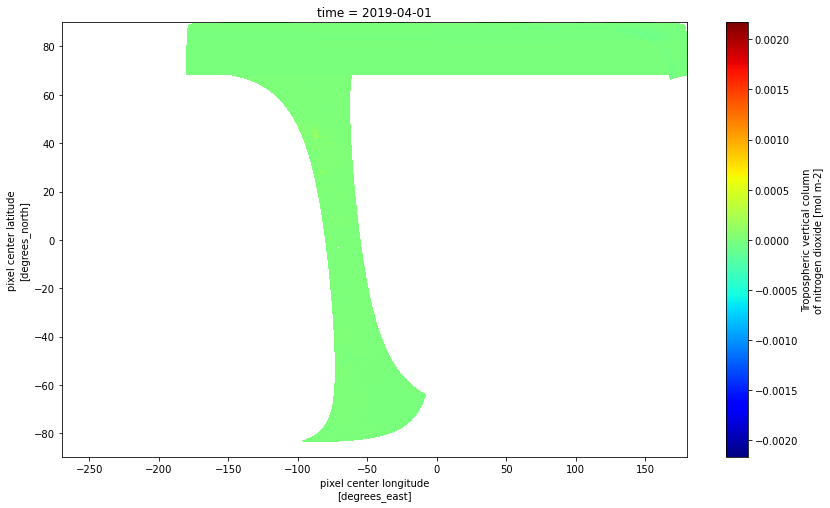

In [20]:
plt.figure(figsize=(14,8))
ax = plt.axes()

xr_sample_file.nitrogendioxide_tropospheric_column[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude',
                                                 add_colorbar=True, cmap='jet');

## Create Multidimensional Raster

#### Create Mosaic DataSet

In [23]:
import arcpy

In [ ]:
coordinate_system="PROJCS['WGS_1984_Web_Mercator_Auxiliary_Sphere',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Mercator_Auxiliary_Sphere'],PARAMETER['False_Easting',0.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',0.0],PARAMETER['Standard_Parallel_1',0.0],PARAMETER['Auxiliary_Sphere_Type',0.0],UNIT['Meter',1.0]]"
in_fgdb = r"C:\Users\atma6951\Documents\ArcGIS\Projects\pro-sp5-new\pro-sp5-new.gdb"

arcpy.management.CreateMosaicDataset(in_workspace=in_fgdb, 
                                     in_mosaicdataset_name="sp5_new_vars",
                                     coordinate_system=coordinate_system)

#### Add rasters to the mosaic dataset

Using UI method 1. No arcpy way to specify vars

In [ ]:
mosaic_ds_path=r"C:\Users\atma6951\Documents\ArcGIS\Projects\pro-sp5-new\pro-sp5-new.gdb\sp5_new"
raster_type= r"NetCDF @ C:\Users\atma6951\Documents\ArcGIS\Projects\pro-sp5-new\pro-sp5-new.gdb\sp5_new\RasterType.OBJECTID=1"
raster_input_path=r"E:\GIS_Data\Imagery\sentinel-5p\ny-2019-2020\04-2019\S5P_OFFL_L2__NO2____20190401T171141_20190401T185312_07595_01_010300_20190407T185548.nc"

arcpy.management.AddRastersToMosaicDataset(in_mosaic_dataset=mosaic_ds_path, 
                                           raster_type=raster_type , 
                                           input_path=raster_input_path, 
                                           update_cellsize_ranges="UPDATE_CELL_SIZES", 
                                           update_boundary="UPDATE_BOUNDARY", 
                                           update_overviews="NO_OVERVIEWS", 
                                           maximum_pyramid_levels=None, 
                                           maximum_cell_size=0, 
                                           minimum_dimension=1500, 
                                           spatial_reference=None, 
                                           filter="*.nc;*.nc4", 
                                           sub_folder="SUBFOLDERS", 
                                           duplicate_items_action="ALLOW_DUPLICATES", 
                                           build_pyramids="NO_PYRAMIDS", 
                                           calculate_statistics="NO_STATISTICS", 
                                           build_thumbnails="NO_THUMBNAILS", 
                                           operation_description='', 
                                           force_spatial_reference="NO_FORCE_SPATIAL_REFERENCE", 
                                           estimate_statistics="NO_STATISTICS", 
                                           aux_inputs=None, 
                                           enable_pixel_cache="NO_PIXEL_CACHE", 
                                           cache_location=r"C:\Users\atma6951\AppData\Local\ESRI\rasterproxies\sp5_new")

Adding netCDF and speficying variables

In [ ]:
mosaic_ds_path = r"Y:\Documents\GIS_data\Imagery\sentinel-5p\pro-5p-multidim2\pro-5p-multidim2.gdb\ny_s5p_multidim"
raster_input_path = r"\\Mac\Home\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\04-2020\S5P_OFFL_L2__NO2____20200401T160821_20200401T174952_12787_01_010302_20200403T083538.nc"
out_proj = "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119521E-09;0.001;0.001;IsHighPrecision"
variables_import = "Variables /PRODUCT/nitrogendioxide_tropospheric_column,/PRODUCT/qa_value"

arcpy.management.AddRastersToMosaicDataset(in_mosaic_dataset=mosaic_ds_path, 
                                           raster_type="NetCDF", 
                                           input_path = raster_input_path,
                                           update_cellsize_ranges="UPDATE_CELL_SIZES", 
                                           update_boundary="UPDATE_BOUNDARY",
                                           update_overviews ="NO_OVERVIEWS", 
                                           maximum_pyramid_levels = None, 
                                           maximum_cell_size=0, 
                                           minimum_dimension=1500, 
                                           spatial_reference = out_proj, 
                                           filter="*.nc;*.nc4", 
                                           sub_folder="NO_SUBFOLDERS", 
                                           duplicate_items_action="ALLOW_DUPLICATES", 
                                           build_pyramids="BUILD_PYRAMIDS", 
                                           calculate_statistics="CALCULATE_STATISTICS", 
                                           build_thumbnails="NO_THUMBNAILS", 
                                           operation_description='', 
                                           force_spatial_reference="NO_FORCE_SPATIAL_REFERENCE",
                                           estimate_statistics="ESTIMATE_STATISTICS", 
                                           aux_inputs=variables_import, 
                                           enable_pixel_cache="NO_PIXEL_CACHE", 
                                           cache_location=r"C:\Users\atma6951\AppData\Local\ESRI\rasterproxies\ny_s5p_multidim")

### Automation for all data over NY
Adding all rasters in the study

In [ ]:
arcpy.management.AddRastersToMosaicDataset("ny_s5p_multidim_v2", 
                                           "NetCDF", 
                                           r"Y:\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\04-2019;Y:\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\04-2020", 
                                           "UPDATE_CELL_SIZES", 
                                           "UPDATE_BOUNDARY", 
                                           "UPDATE_OVERVIEWS", 
                                           None, 
                                           0, 
                                           1500, 
                                           None, 
                                           "*.nc;*.nc4", 
                                           "NO_SUBFOLDERS", 
                                           "ALLOW_DUPLICATES", 
                                           "NO_PYRAMIDS", 
                                           "NO_STATISTICS", 
                                           "NO_THUMBNAILS", 
                                           "add vars 2019 2020", 
                                           "NO_FORCE_SPATIAL_REFERENCE", 
                                           "NO_STATISTICS", 
                                           "Variables /PRODUCT/nitrogendioxide_tropospheric_column,/PRODUCT/qa_value", 
                                           "NO_PIXEL_CACHE", 
                                           r"C:\Users\atma6951\AppData\Local\ESRI\rasterproxies\ny_s5p_multidim_v2")

Building stats

In [ ]:
arcpy.management.BuildPyramidsandStatistics("ny_s5p_multidim", 
                                            "INCLUDE_SUBDIRECTORIES", 
                                            "BUILD_PYRAMIDS", 
                                            "CALCULATE_STATISTICS", 
                                            "NONE", 
                                            '', 
                                            "NONE", 
                                            1, 
                                            1, 
                                            [], 
                                            -1, 
                                            "NONE", 
                                            "NEAREST", 
                                            "DEFAULT", 
                                            75, "SKIP_EXISTING", '', "NONE")

Subset multidimensional raster to CRF, applies NY AOI as processing extent

In [ ]:
arcpy.md.SubsetMultidimensionalRaster(r"Y:\Documents\GIS_data\Imagery\sentinel-5p\pro-5p-multidim2\pro-5p-multidim2.gdb\ny_s5p_multidim_v2", 
                                      r"Y:\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\ny_crf\ny_19_20.crf", 
                                      "/product/nitrogendioxide_tropospheric_column;/product/qa_value", 
                                      "ALL", None, None, '', '', '', None, '')

## References

1. [NASA - Remote sensing of NO2, OMI data products and tools](https://appliedsciences.nasa.gov/sites/default/files/NO2_Session_1_final.pdf)
2. [EPA - Basic information about NO2](https://www.epa.gov/no2-pollution/basic-information-about-no2)